5866


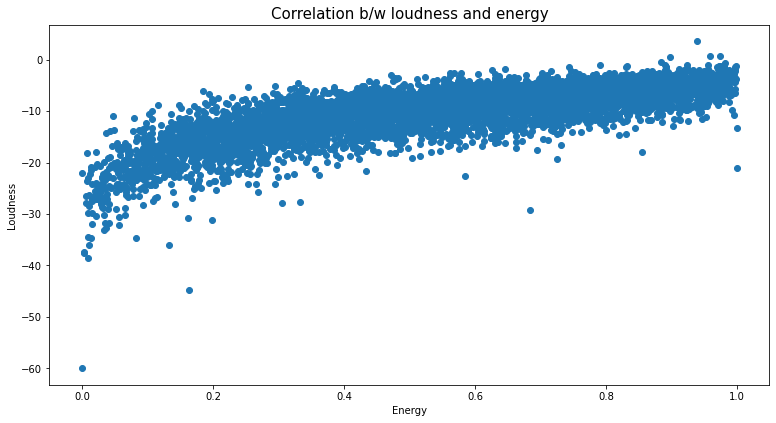

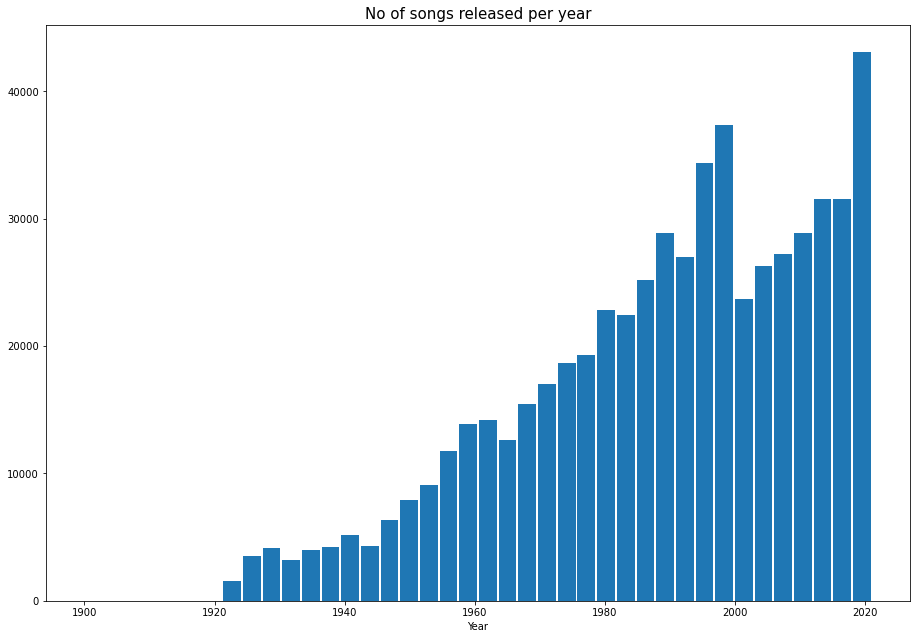

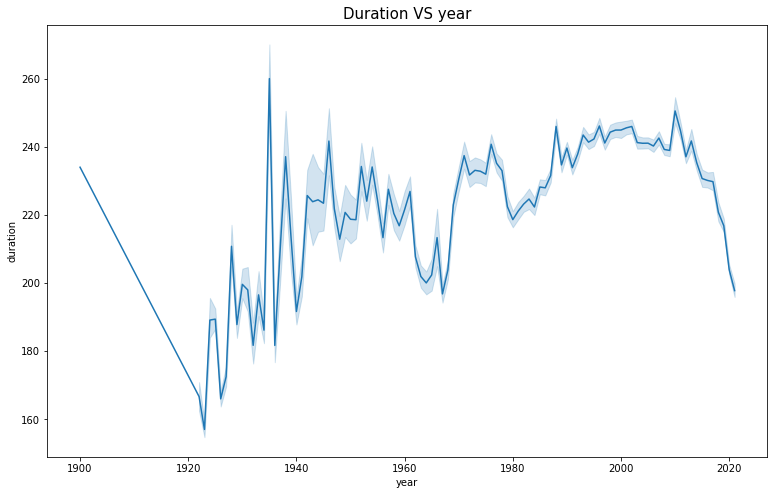

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tracks = pd.read_csv("tracks.csv")

#1- checking top 5 rows
df_tracks.head()    


#check for total no of null values for each column. can also use - df_tracks.info()
pd.isnull(df_tracks).sum()  

#2 - checking data info
#df_tracks.info()

#3- 10 most popular songs present in spotify dataset
most_popular = df_tracks.sort_values(by = 'popularity',ascending=False).head(10)
most_popular


#4- Least popular 10 songs present on spotify having popularity<10
least_popular = df_tracks.query('popularity<10', inplace=False).sort_values('popularity', ascending=True)
least_popular[:10]              


#5- setting 'release_date' column to index and changing it's datatype to datetime
df_tracks_new = df_tracks.set_index('release_date')
df_tracks_new.index = pd.to_datetime(df_tracks_new.index)
df_tracks_new.head()


#6- selecting the songs released on '1922-02-22'
df_tracks_new.loc['1922-02-22', ['name','artists']]


#7 - create a new column duration for time in seconds from column duration_ms
df_tracks_new["duration"] = df_tracks_new["duration_ms"].apply(lambda x: round(x/1000))
df_tracks_new.drop('duration_ms', inplace=True, axis=1)
df_tracks_new.head()


#8 - taking a sample of 1% of total data and plotting a scatter plot b/w loudness and energy
sample_df = df_tracks_new.sample(int(0.01*len(df_tracks_new)))
print(len(sample_df))
fig = plt.figure(figsize = [10,5])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Correlation b/w loudness and energy",fontsize=15)
ax.set_xlabel("Energy")
ax.set_ylabel("Loudness")
ax.scatter(x = sample_df['energy'], y = sample_df['loudness'])


#9 - plot a histogram for no of songs released per year
df_tracks_new = df_tracks_new.reset_index()            
df_tracks_new['year'] = df_tracks_new['release_date'].dt.year        
fig = plt.figure(figsize=[12,8])
ax = fig.add_axes([0,0,1,1])
ax.set_title("No of songs released per year",fontsize=15)
ax.set_xlabel("Year")
ax.hist(df_tracks_new['year'],bins=40, rwidth=0.9)


#10 - plot a line chart for average duration of songs over the years
dr = df_tracks_new.duration
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Duration VS year",fontsize=15)
fig = sns.lineplot(x=df_tracks_new.year , y=dr)

